  ## **Graduate Rotational Internship Program**
  ### **The Sparks Foundation**
#### **Task#1**
Predict the percentage of an student based on the no. of study hours
Simple Linear Regression
### **Author: Muhammad Hasnain** 

#### Importing all required libraries 

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sn

import matplotlib.pyplot as plt  
%matplotlib inline

#### Reading Data from the given link

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Students Hours and Scores Data:")

s_data.head(10)

Students Hours and Scores Data:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Checking Data for null values

In [5]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Representation of Score

# Representation of Score
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

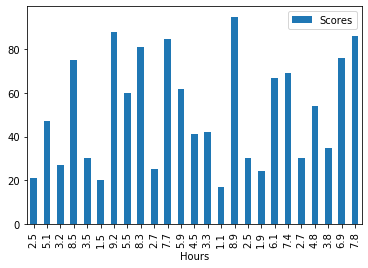

In [7]:
s_data.plot(x='Hours', y='Scores',  kind="bar")
plt.show()

#### Correlation between variables

In [8]:
s_data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
s_data.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [10]:
hours=s_data['Hours']
scores=s_data['Scores']

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


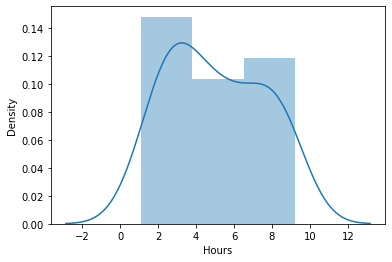

In [11]:
sn.distplot(hours)
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


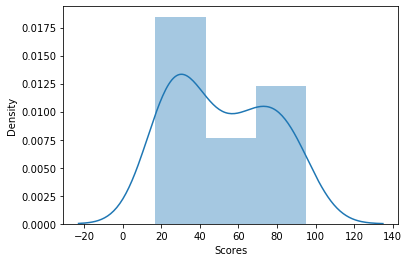

In [12]:
sn.distplot(scores)
plt.show()

#### Preparing the data

In [13]:
#divide the data into "attributes" (inputs) and "labels" (outputs).
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values 

In [15]:
#the next step is to split this data into training and test sets 
#using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

#### Training the Algorithm

In [17]:
#Training the Algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


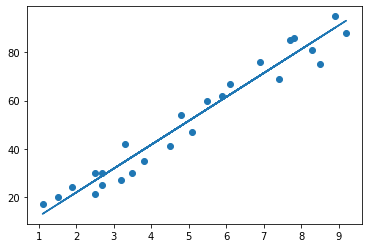

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### Now its time to predict some data

In [20]:
#Making Predictions(Now its time to predict some data)
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### Comparision

In [21]:
#Actual vs Predicted(Comparision)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


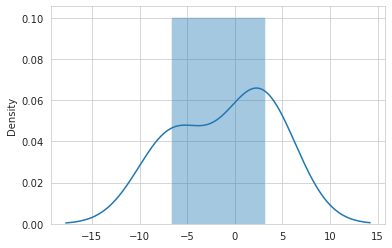

In [79]:
sn.set_style('whitegrid')
sn.distplot(y_test-y_pred)
plt.show()

In [68]:
# lets test our own data/student study hours 9.25
hours=9.25
scores=regressor.predict([[hours]])
print('if the student study for {} hours per day the student will score {}%'.format(hours,scores))

if the student study for 9.25 hours per day the student will score [93.69173249]%


#### Evaluating the model

In [67]:
#Evaluating the model
from sklearn import metrics 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
